# ***The Legendary Titanic Machine Learning Competition***

# ***The challenge : use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.***

## **Data Dictionary** :

### Survived : Survival -> (0 = No, 1 = Yes)
### pclass : Ticket class -> (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
### Sex : Gender 
### Age : Age in years
### Sibsp : siblings / spouses aboard the Titanic.
### Sarch : parents / children aboard the Titanic
### Ticket : Ticket number
### Fare : Passenger fare
### Cabin : Cabin number
### Embarked : Port of Embarkation -> (C = Cherbourg, Q = Queenstown, S = Southampton)


## **Variable Notes** :
### pclass: A proxy for socio-economic status (SES)
### 1st = Upper
### 2nd = Middle
### 3rd = Lower
### age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
### sibsp: The dataset defines family relations in this way...
### Sibling = brother, sister, stepbrother, stepsister
### Spouse = husband, wife (mistresses and fiancés were ignored)
### parch: The dataset defines family relations in this way...
### Parent = mother, father
### Child = daughter, son, stepdaughter, stepson
### Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dftrain = pd.read_csv('titanic_train.csv')
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


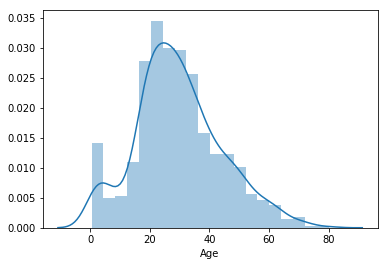

In [4]:
sns.distplot(dftrain["Age"].dropna())

# EDA

### First of all, let's see our data distribution 

In [5]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
listitem = []
for col in dftrain.columns :
    listitem.append([col, dftrain[col].dtype, dftrain[col].isna().sum(),
                    round((dftrain[col].isna().sum()/len(dftrain[col]))*100,2),
                         dftrain[col].nunique(), list(dftrain[col].unique()[:2])]);
dfdesc = pd.DataFrame(columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data = listitem)
dfdesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,PassengerId,int64,0,0.00,891,"[1, 2]"
1,Survived,int64,0,0.00,2,"[0, 1]"
2,Pclass,int64,0,0.00,3,"[3, 1]"
3,Name,object,0,0.00,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
4,Sex,object,0,0.00,2,"[male, female]"
5,Age,float64,177,19.87,88,"[22.0, 38.0]"
6,SibSp,int64,0,0.00,7,"[1, 0]"
7,Parch,int64,0,0.00,7,"[0, 1]"
8,Ticket,object,0,0.00,681,"[A/5 21171, PC 17599]"
9,Fare,float64,0,0.00,248,"[7.25, 71.2833]"


In [7]:
dftrain.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


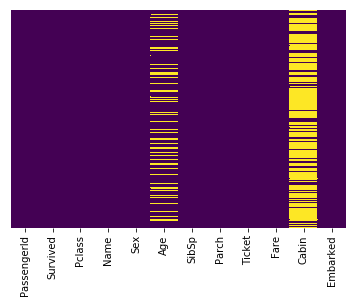

In [8]:
sns.heatmap(dftrain.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## Let us plot correlation plot, to find out correlation and realtion between each features. 

## Correlation plot can also help us making our model, to determine or specify variables for our model.

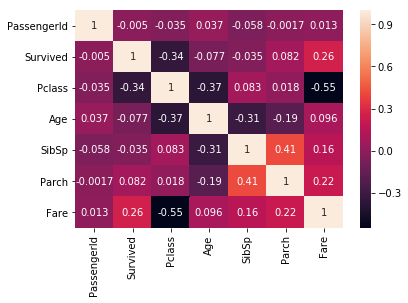

In [9]:
sns.heatmap(dftrain.corr(), annot=True)  

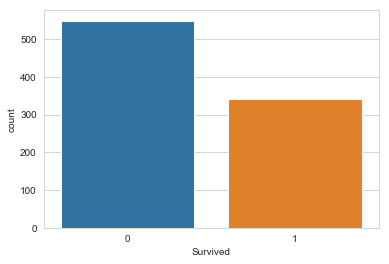

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data  = dftrain)

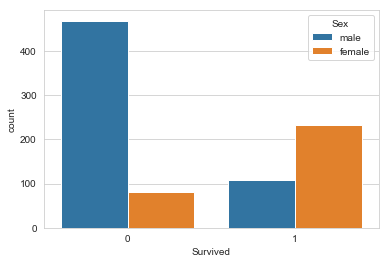

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data  = dftrain, hue = 'Sex')   

## We can see from the plot above, there's a strong correlation/effect between "GENDER" and "SURVIVED".

## As you can see, "FEMALE" gender has more possibility to survived.

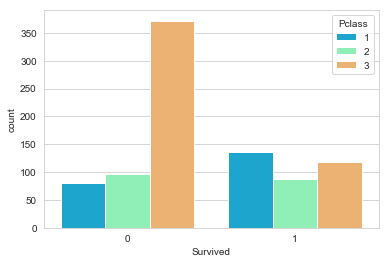

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data  = dftrain, hue = 'Pclass', palette='rainbow')   

## Passengers with 1st class ticket have more possibility "SURVIVED". 
## As 1st class passengers being prioritized to be saved.
## How about passengers embarked port? Is it important? See plot below.

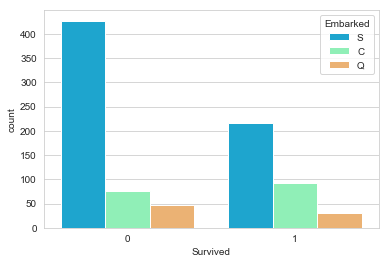

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data  = dftrain, hue = 'Embarked', palette='rainbow')   

## Same pattern right? Between 'survived' or 'not-survived'
## meaning where passengers embarked, doesn't affect passengers survived.

## Total of passengers per age :

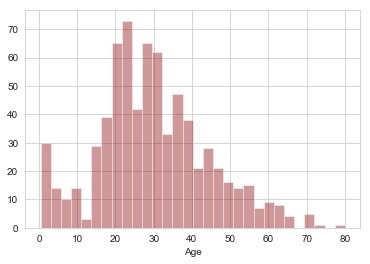

In [14]:
sns.distplot(dftrain['Age'].dropna(), kde=False, color='darkred', bins=30)

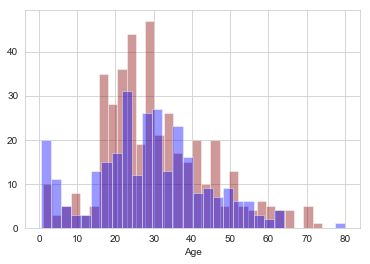

In [15]:
sns.distplot(dftrain[dftrain['Survived']==0]['Age'].dropna(), kde=False, color='darkred', bins=30)
sns.distplot(dftrain[dftrain['Survived']==1]['Age'].dropna(), kde=False, color='blue', bins=30)

## So many young generation on board. 
## As we could see age 20-30 are the most passengers on board, but with high percentage didn't survived.
## Age 30-40 has a high percentage "not-survived" too.

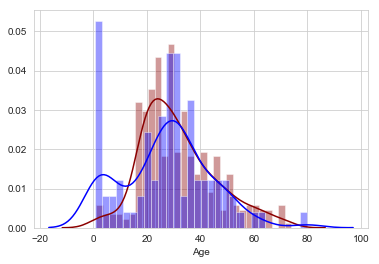

In [16]:
sns.distplot(dftrain[(dftrain['Survived']==0) & (dftrain['Sex']=='male')]['Age'].dropna(), kde=True, color='darkred', bins=30)
sns.distplot(dftrain[(dftrain['Survived']==1) & (dftrain['Sex']=='male')]['Age'].dropna(), kde=True, color='blue', bins=30)

# Babies survived ! Yeay !

In [17]:
dftrain[dftrain['Age'] < 1 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [18]:
dftrain[dftrain['Age'] > 70 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


## Fare / Ticket Price

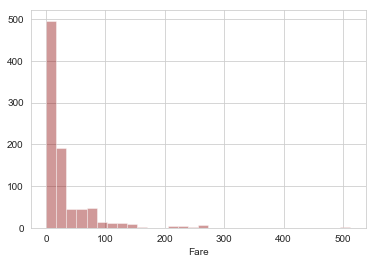

In [19]:
sns.distplot(dftrain['Fare'].dropna(), kde=False, color='darkred', bins=30)

In [20]:
dftrain[dftrain['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [21]:
dftrain[dftrain['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


## Sibling or Spouse

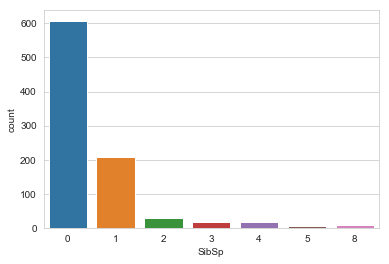

In [22]:
sns.countplot(x='SibSp', data = dftrain)

## A family on board with 8 members 

In [23]:
dftrain[dftrain['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [24]:
dftrain[dftrain['SibSp']==5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


## Is it true, Jack and Rose from the film 'Titanic' really on board ? Curious

In [25]:
dftrain[dftrain['Name'].str.contains('Rose')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S


In [26]:
dftrain[dftrain['Name'].str.contains('Jack')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C


# **Dealing with missing Data**

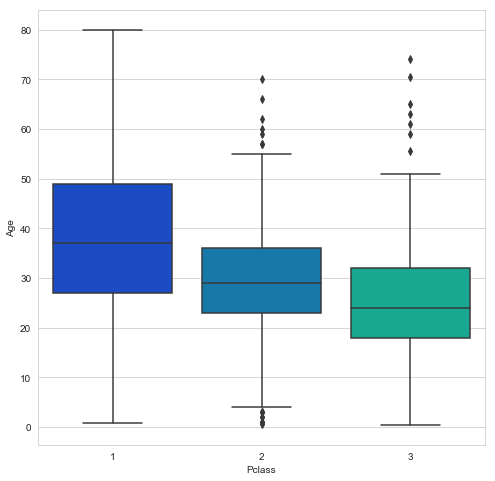

In [27]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Pclass', y='Age', data =dftrain, palette='winter')

## The average number for each pclass have thin class, except for "pclass" 1 or 1st class from age 35-40. 
## This is reasonable, because at the age 35-40 people at the peak of their "working age" with more established financially.

## Between "sex/gender" and "age" :

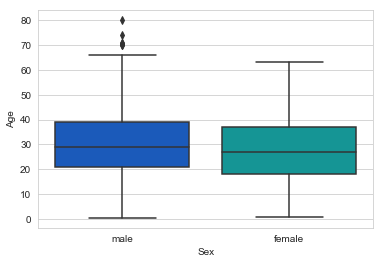

In [28]:
sns.boxplot(x='Sex', y='Age', data =dftrain, palette='winter')

In [29]:
dftrain.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


## Now i'm trying to deal with missing datas

In [30]:
def imput_age(cols):
    Age = cols['Age']
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass ==2 :
            return 30
        elif Pclass == 3 :
            return 25
    else : 
        return Age

In [31]:
dftrain["Age"] = dftrain[['Age', 'Pclass']].apply(imput_age,axis = 1)
dftrain['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      25.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     25.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     25.0
27     19.0
28     25.0
29     25.0
       ... 
861    21.0
862    48.0
863    25.0
864    24.0
865    42.0
866    27.0
867    31.0
868    25.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    25.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

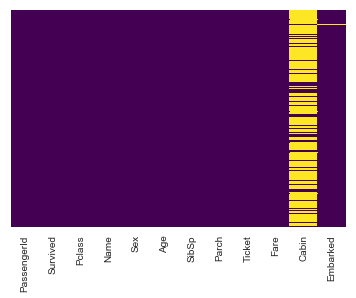

In [32]:
sns.heatmap(dftrain.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## GREAT, no more missing data.

In [33]:
dftrain.drop('Cabin',axis=1, inplace=True)

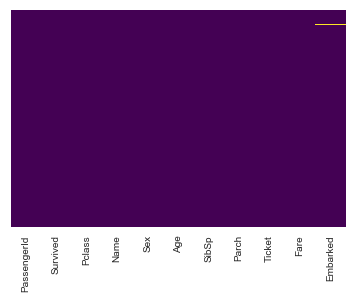

In [34]:
sns.heatmap(dftrain.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## Still there are some missing datas in 'embarked'.
## But there are only 2 missing datas now. So i choose to drop it, because won't affect significantly.

In [35]:
dftrain.dropna(inplace=True)

In [36]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# **One Hot Encoding**

In [37]:
sex = pd.get_dummies(dftrain['Sex'], drop_first=True)
embark = pd.get_dummies(dftrain['Embarked'], drop_first=True)

In [38]:
dftrain.drop(['Sex','Embarked', 'Name','Ticket', 'PassengerId'], axis=1,inplace=True)

In [39]:
dftrain=pd.concat([dftrain,sex,embark],axis=1)

In [40]:
dftrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# **Train Test Split**

## Making machine learning model, i'll use Random Forest

In [43]:
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split(
    dftrain.drop('Survived', axis=1),
    dftrain['Survived'], 
    test_size = .3,
    random_state = 101
)

In [46]:
ytr.value_counts()/(386+236) #ytr sum percentage

0    0.620579
1    0.379421
Name: Survived, dtype: float64

In [48]:
yts.value_counts()/(163+104)  #yts sum percentage

0    0.610487
1    0.389513
Name: Survived, dtype: float64

## Same ratio for train and test, also survived real data

## **Random Forest Classifier**

## **Model Machine Learning**

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=50)
rfc.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

## **Feature Importances**

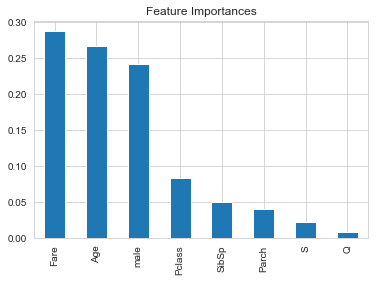

In [50]:
coef1=pd.Series(rfc.feature_importances_, xtr.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title = 'Feature Importances')

## Based on Feature Importances

# **Model Evaluation**

## **Training Error**

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, log_loss, roc_auc_score, f1_score, matthews_corrcoef, auc

In [52]:
predicttrain=rfc.predict(xtr)
predicttrain     

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [53]:
len(predicttrain)

622

In [54]:
sum(predicttrain)

234

In [55]:
con = pd.DataFrame(data = confusion_matrix(ytr,predicttrain), columns = ['P NO', 'P YES'],
                  index = ['A NO', 'A YES']);
print(con)

       P NO  P YES
A NO    383      3
A YES     5    231


In [56]:
print('Precision No : ' , 383/(383+5))
print('Precision Yes : ' , 231/(231+3))
print('Recall No : ', 383/(383+3))
print('Recall Yes: ', 231/(231+5))

Precision No :  0.9871134020618557
Precision Yes :  0.9871794871794872
Recall No :  0.9922279792746114
Recall Yes:  0.9788135593220338


In [57]:
print(classification_report(ytr,predicttrain
                           ))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       386
           1       0.99      0.98      0.98       236

    accuracy                           0.99       622
   macro avg       0.99      0.99      0.99       622
weighted avg       0.99      0.99      0.99       622



In [58]:
predicttest = rfc.predict(xts)
print(classification_report(yts,predicttest))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       163
           1       0.78      0.73      0.75       104

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



In [59]:
print('Accuracy : ' + str(accuracy_score(ytr,predicttrain)))

Accuracy : 0.9871382636655949


In [60]:
predictprobatrain = rfc.predict_proba(xtr)
predictprobatrain

array([[0.72 , 0.28 ],
       [0.058, 0.942],
       [0.13 , 0.87 ],
       ...,
       [0.39 , 0.61 ],
       [0.99 , 0.01 ],
       [0.05 , 0.95 ]])

In [61]:
listpredict = []
for i in predictprobatrain :
    if i[1] > 0 :
        listpredict.append(1)
    else :
        listpredict.append(0)
listpredict

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


<module 'matplotlib.pyplot' from 'C:\\Users\\asus\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

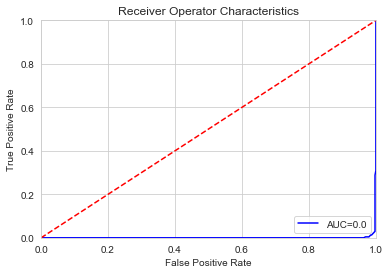

In [62]:
preds = predictprobatrain[:,0]                      
fpr,tpr, threshold = roc_curve(ytr, preds)
roc_auc = auc(fpr,tpr)

import matplotlib.pyplot as plt
# figure(figsize = (10,8))
plt.title('Receiver Operator Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC={}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt

In [63]:
print(fpr[-5:])
print(tpr[-5:])
print(threshold[-5:])

[1. 1. 1. 1. 1.]
[0.79661017 0.86440678 0.86864407 0.8940678  1.        ]
[0.016      0.01       0.00714286 0.00428571 0.        ]


In [64]:
log_loss(ytr,predictprobatrain[:,1])

0.1177920860210075

## The goal of our machine learning models is to minimize this value. A perfect model would have a **Log loss** close to 0. 
## **Log loss** increases as the predicted probability diverges from the actual label.

In [65]:
predicttest = rfc.predict(xts)
con = pd.DataFrame(data = confusion_matrix(yts,predicttest), columns = ['P NO', 'P YES'],
                  index = ['A NO', 'A YES']);
print(con)
print('\n')
print(classification_report(yts,predicttest))

       P NO  P YES
A NO    141     22
A YES    28     76


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       163
           1       0.78      0.73      0.75       104

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



In [66]:
predictprobatest = rfc.predict_proba(xts)
predictprobatest

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.11      , 0.89      ],
       [0.        , 1.        ],
       [0.91      , 0.09      ],
       [0.89      , 0.11      ],
       [0.14      , 0.86      ],
       [0.65690476, 0.34309524],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       [0.005     , 0.995     ],
       [0.04      , 0.96      ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.7       , 0.3       ],
       [0.97      , 0.03      ],
       [0.        , 1.        ],
       [0.02      , 0.98      ],
       [0.201     , 0.799     ],
       [0.73      , 0.27      ],
       [0.63      , 0.37      ],
       [0.946     , 0.054     ],
       [0.92      , 0.08      ],
       [0.86      , 0.14      ],
       [0.96      , 0.04      ],
       [0.58      , 0.42      ],
       [0.38      , 0.62      ],
       [0.4       , 0.6       ],
       [0.54      , 0.46      ],
       [1.        , 0.        ],
       [0.

In [67]:
listpredicttest = []
for i in predictprobatest :
    if i[1] > 0 :
        listpredicttest.append(1)
    else :
        listpredicttest.append(0)
listpredicttest

[0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,


<module 'matplotlib.pyplot' from 'C:\\Users\\asus\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

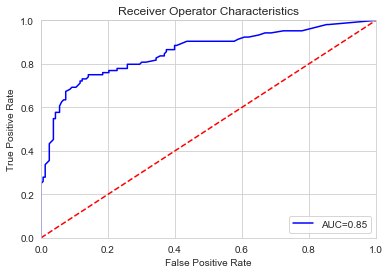

In [68]:
preds = predictprobatest[:,1]                      
fpr,tpr, threshold = roc_curve(yts, preds)
roc_auc = auc(fpr,tpr)

import matplotlib.pyplot as plt
# figure(figsize = (10,8))
plt.title('Receiver Operator Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC={}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt

In [69]:
log_loss(yts,predictprobatest[:,1])

0.6972823535004335

# **K-FOLD**

In [73]:
from sklearn.model_selection import KFold
K  = 10
kf = KFold(n_splits = K, shuffle=True, random_state = 42)

In [74]:
data = dftrain.drop('Survived', axis = 1)
target = dftrain['Survived']

In [75]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictprob=model.predict_proba(X_train)
    f1 = f1_score(y_train, predictions, average = 'macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train,predictprob[:,1])
    accuracy = accuracy_score(y_train, predictions)
    logloss = log_loss(y_train, predictions)
    return {
        'report' : report,
        'f1' : f1,
        'roc':roc_auc,
        'acc':accuracy,
        'logloss':logloss
    }
def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictprob=model.predict_proba(X_test)
    f1 = f1_score(y_test, predictions, average = 'macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test,predictprob[:,1])
    accuracy = accuracy_score(y_test, predictions)
    logloss = log_loss(y_test, predictions)
    return {
        'report' : report,
        'f1' : f1,
        'roc':roc_auc,
        'acc':accuracy,
        'logloss':logloss
    }

def calc_metrics(X_train, y_train, X_test ,y_test, model):
    
    # fits model and returns the in-sample error and out of sample error
    
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_train, y_train, model)
    return train_error, validation_error

In [76]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data,target):
    #split data
    X_train,X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val= target.iloc[train_index], target.iloc[val_index]
    
    #print(len(X_val))
    
    #instantiate model
    rfc = RandomForestClassifier(n_estimators=100, random_state=101)
    
    #calculate errors
    train_error, val_error= calc_metrics(X_train, y_train, X_val, y_val, rfc)
    
    #append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)
print(train_errors[1]['acc'])
# print(t_errors)

0.985


In [77]:
acc=[]
val_acc=[]
roc = []
val_roc=[]
log=[]
val_log=[]
f1=[]
val_f1=[]
for i in range(10):
    acc.append(train_errors[i]['acc'])
    val_acc.append(validation_errors[i]['acc'])
    roc.append(train_errors[i]['roc'])
    val_roc.append(validation_errors[i]['roc'])
    log.append(train_errors[i]['logloss'])
    val_log.append(validation_errors[i]['logloss'])
    f1.append(train_errors[i]['f1'])
    val_f1.append(validation_errors[i]['f1'])
dicti = {'Train Accuracy' : acc ,'Test Accuracy' : val_acc, 
         'Train ROC AUC': roc,'Test ROC AUC':val_roc,
        'Train F1 Score': f1, 'Test F1 Score':val_f1,
        'Train Log Loss': log, 'Test Log Loss':val_log}

dfnew=pd.DataFrame(dicti)
# print(dfnew)
avg=[]
for i in range(10):
    avg.append(dfnew.loc[i].mean()) 
print(avg)

[0.911744576653828, 0.8710792729933593, 0.8916247610302631, 0.9115300398323865, 0.9014599190090109, 0.8915312757117216, 0.8812890159768925, 0.8811299492374672, 0.9116479862621424, 0.9013717915466941]


In [78]:
import numpy as np
listItem =[]

for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['acc'], val['acc'], tr['roc'], val['roc'], tr['f1'], val['f1'], 
                     tr['logloss'], val['logloss']])


listItem.append(list(np.mean(listItem, axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                         columns=['Train Accuracy',
                                 'Test Accuracy',
                                 'Train ROC AUC',
                                  'Test ROC AUC',
                                 'Train F1 Score',
                                 'Test F1 Score',
                                 'Train Log Loss',
                                 'Test Log Loss'])
listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss
0,0.980000,0.980000,0.997367,0.997367,0.978831,0.978831,0.690781,0.690781
1,0.985000,0.985000,0.997254,0.997254,0.983979,0.983979,0.518085,0.518085
2,0.982500,0.982500,0.998066,0.998066,0.981500,0.981500,0.604434,0.604434
3,0.980000,0.980000,0.996758,0.996758,0.978580,0.978580,0.690783,0.690783
4,0.981250,0.981250,0.997081,0.997081,0.979905,0.979905,0.647604,0.647604
5,0.982500,0.982500,0.997693,0.997693,0.981500,0.981500,0.604433,0.604433
6,0.983750,0.983750,0.997423,0.997423,0.982724,0.982724,0.561259,0.561259
7,0.983750,0.983750,0.996742,0.996742,0.982768,0.982768,0.561260,0.561260
8,0.980000,0.980000,0.996930,0.996930,0.978883,0.978883,0.690780,0.690780
9,0.981273,0.981273,0.997310,0.997310,0.980106,0.980106,0.646798,0.646798


# **Learning Curve**

In [79]:
rfc = RandomForestClassifier(n_estimators=100)

In [80]:
np.linspace (0.3, 1.0, 5)

array([0.3  , 0.475, 0.65 , 0.825, 1.   ])

## Learning curve for accuracy


Train Scores: 
[[0.9875     0.9875     0.99583333 0.99166667 0.99166667 0.99166667
  0.99166667 0.99166667 0.99166667 0.99166667]
 [0.98421053 0.98421053 0.99473684 0.98684211 0.98684211 0.98421053
  0.98421053 0.98421053 0.98421053 0.98421053]
 [0.98073218 0.98073218 0.98843931 0.98073218 0.98458574 0.98073218
  0.98651252 0.98458574 0.98651252 0.98651252]
 [0.98181818 0.98181818 0.98636364 0.98030303 0.98181818 0.98181818
  0.98030303 0.98030303 0.98181818 0.98181818]
 [0.9825     0.9825     0.98625    0.98125    0.9825     0.9825
  0.98125    0.9825     0.98       0.98125   ]]

Train Mean: 
[0.99125    0.98578947 0.98400771 0.98181818 0.98225   ]

Train Size: 
[240 380 519 660 800]

Train Std: 
[0.00224382 0.00315789 0.00286437 0.00165977 0.00156125]

Test Scores: 
[[0.70786517 0.70786517 0.74157303 0.82022472 0.86516854 0.71910112
  0.76404494 0.73033708 0.79775281 0.73863636]
 [0.74157303 0.75280899 0.76404494 0.84269663 0.87640449 0.76404494
  0.76404494 0.75280899 0.84269663 0.

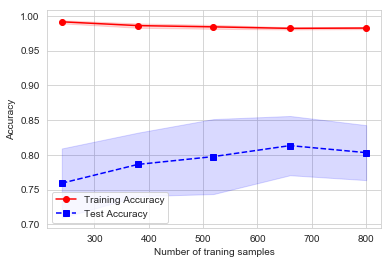

In [82]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rfc,
                                                       X = data,
                                                       y = target,
                                                       train_sizes = np.linspace (0.3, 1.0, 5),
                                                        cv =10,
                                                       scoring = 'accuracy')

print('\nTrain Scores: ')
print(train_scores)
# mean value of accuracy against training data, for every train size
train_mean = np.mean(train_scores, axis=1)
print('\nTrain Mean: ')
print(train_mean)
print ('\nTrain Size: ')
print(train_sizes)

# standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)
print('\nTrain Std: ')
print(train_std)

#same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print('\nTest Scores: ')
print(test_scores)
print('\nTest Mean: ')
print(test_mean)
print('\nTest Std: ')
print(test_std)

# Plot training accuracies
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha = 0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s',
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha = 0.15, color='blue')
plt.xlabel('Number of traning samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Learning curve for log_loss


Train Scores: 
[[-0.13899501 -0.13766957 -0.12668264 -0.13818571 -0.14333203 -0.14075678
  -0.13780762 -0.14269614 -0.13745837 -0.1387886 ]
 [-0.12787026 -0.13624828 -0.11414568 -0.13253141 -0.14041782 -0.13917884
  -0.14134863 -0.136902   -0.13456007 -0.13749913]
 [-0.12383941 -0.13330974 -0.11508264 -0.13069188 -0.13547469 -0.13110956
  -0.12415047 -0.12684972 -0.12473906 -0.12598388]
 [-0.12017207 -0.12473102 -0.11230943 -0.12607507 -0.12740161 -0.12718051
  -0.12569646 -0.12519893 -0.12391944 -0.12649547]
 [-0.11733066 -0.12503204 -0.11116332 -0.12462118 -0.12505534 -0.12534001
  -0.12152351 -0.12309651 -0.12661305 -0.12129981]]

Train Mean: 
[-0.13823725 -0.13407021 -0.12712311 -0.123918   -0.12210754]

Train Size: 
[240 380 519 660 800]

Train Std: 
[0.00433232 0.00762837 0.00555247 0.00433972 0.00445954]

Test Scores: 
[[-0.6148278  -0.94632248 -1.37838294 -0.77123263 -1.09729508 -0.91366244
  -0.55366524 -0.55651199 -0.44945066 -0.4409445 ]
 [-0.92714524 -0.85245756 -1.7154918

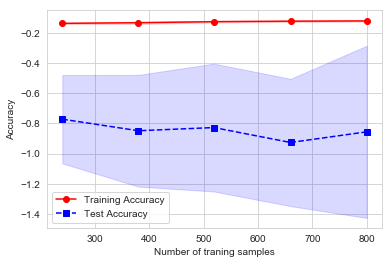

In [83]:
train_sizes, train_scores, test_scores = learning_curve(estimator=rfc,
                                                       X = data,
                                                       y = target,
                                                       train_sizes = np.linspace (0.3, 1.0, 5),
                                                        cv =10,
                                                       scoring = 'neg_log_loss')



print('\nTrain Scores: ')
print(train_scores)
# mean value of accuracy against training data, for every train size
train_mean = np.mean(train_scores, axis=1)
print('\nTrain Mean: ')
print(train_mean)
print ('\nTrain Size: ')
print(train_sizes)

# standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)
print('\nTrain Std: ')
print(train_std)

#same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print('\nTest Scores: ')
print(test_scores)
print('\nTest Mean: ')
print(test_mean)
print('\nTest Std: ')
print(test_std)
# Plot training accuracies
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha = 0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s',
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha = 0.15, color='blue')
plt.xlabel('Number of traning samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## ***As you can see we had a good model here, altough to find outlier from our data we can use Clustering too***